<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Máster Universitario en Análisis y Visualización de Datos Masivos/ Visual Analytics and Big Data </header1></center>
<center><h2>Modelo predictivo de zonas de Madrid con mayor incidencia de enfermedades respiratorias </header2><center>
    <center><h3>Zona Norte</header3><center>

Presentado por: Adela Corina Ponce Román y Hugo Gómez Bahamonde<br>
Fecha: 15/01/2025

# Importación de librerias necesarias

In [5]:
import pandas as pd
from pandas import read_csv
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.18.0


In [6]:
# Asegurar que los resultados sean reproducibles
np.random.seed(1234)
tf.random.set_seed(1234)

# I. Análisis exploratorio

## Cargar el Dataset

 La información del conjunto de datos están relacionados con las defunciones mensuales por enfermedades respiratorias y los niveles de concetración de contaminantes (NOX, SOx, PM<2,5, PM<10, Ozono y benceno) por zonas de Madrid. Los niveles de concentración de contaminantes vienen dados en microgramos por metro cúbico. Se trata de un dataset de formato .csv de 7 variables numéricas y 1 categórica con   

In [9]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/hgba88/TFM/refs/heads/main/Contaminantes_Muertes_pivotado.csv'
dataset = pd.read_csv(url, sep=';')

## Descripción de la fuente del Dataset

In [11]:
print(dataset.shape)

(143, 37)


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mes                       143 non-null    object 
 1   SO2_InteriorM30           143 non-null    float64
 2   SO2_Norte                 143 non-null    int64  
 3   SO2_Sur                   143 non-null    float64
 4   SO2_Este                  143 non-null    float64
 5   SO2_Oeste                 143 non-null    int64  
 6   NO_InteriorM30            143 non-null    float64
 7   NO_Norte                  143 non-null    float64
 8   NO_Sur                    143 non-null    float64
 9   NO_Este                   143 non-null    float64
 10  NO_Oeste                  143 non-null    float64
 11  O3_InteriorM30            143 non-null    float64
 12  O3_Norte                  143 non-null    float64
 13  O3_Sur                    143 non-null    float64
 14  O3_Este   

In [13]:
# Se cambia el tipo de datos de las columnas tipo object (Mes) --> datetime; las columnas tipo float64 -> int64 
dataset['Mes'] = pd.to_datetime(dataset['Mes'])
dataset['SO2_InteriorM30'] = dataset['SO2_InteriorM30'].astype('int64')
dataset['SO2_Sur'] = dataset['SO2_Sur'].astype('int64')
dataset['SO2_Este'] = dataset['SO2_Este'].astype('int64')
dataset['NO_InteriorM30'] = dataset['NO_InteriorM30'].astype('int64')
dataset['NO_Norte'] = dataset['NO_Norte'].astype('int64')
dataset['NO_Sur'] = dataset['NO_Sur'].astype('int64')
dataset['NO_Este'] = dataset['NO_Este'].astype('int64')
dataset['NO_Oeste'] = dataset['NO_Oeste'].astype('int64')
dataset['O3_InteriorM30'] = dataset['O3_InteriorM30'].astype('int64')
dataset['O3_Norte'] = dataset['O3_Norte'].astype('int64')
dataset['O3_Sur'] = dataset['O3_Sur'].astype('int64')
dataset['O3_Oeste'] = dataset['O3_Oeste'].astype('int64')
dataset['Particulas25_InteriorM30'] = dataset['Particulas25_InteriorM30'].astype('int64')
dataset['Particulas10_InteriorM30'] = dataset['Particulas10_InteriorM30'].astype('int64')
dataset['Particulas10_Norte'] = dataset['Particulas10_Norte'].astype('int64')
dataset['Benceno_InteriorM30'] = dataset['Benceno_InteriorM30'].astype('int64')
dataset['Benceno_Norte'] = dataset['Benceno_Norte'].astype('int64')
dataset['Benceno_Sur'] = dataset['Benceno_Sur'].astype('int64')
dataset['Benceno_Oeste'] = dataset['Benceno_Oeste'].astype('int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Mes                       143 non-null    datetime64[ns]
 1   SO2_InteriorM30           143 non-null    int64         
 2   SO2_Norte                 143 non-null    int64         
 3   SO2_Sur                   143 non-null    int64         
 4   SO2_Este                  143 non-null    int64         
 5   SO2_Oeste                 143 non-null    int64         
 6   NO_InteriorM30            143 non-null    int64         
 7   NO_Norte                  143 non-null    int64         
 8   NO_Sur                    143 non-null    int64         
 9   NO_Este                   143 non-null    int64         
 10  NO_Oeste                  143 non-null    int64         
 11  O3_InteriorM30            143 non-null    int64         
 12  O3_Norte              

In [14]:
# Se cambia el tipo de datos de las columnas tipo object (Mes) --> datetime; las columnas tipo float64 -> int64 

dataset['Mes'] = pd.to_datetime(dataset['Mes'])
dataset['SO2_InteriorM30'] = dataset['SO2_InteriorM30'].astype('int64')
dataset['SO2_Sur'] = dataset['SO2_Sur'].astype('int64')
dataset['SO2_Este'] = dataset['SO2_Este'].astype('int64')
dataset['NO_InteriorM30'] = dataset['NO_InteriorM30'].astype('int64')
dataset['NO_Norte'] = dataset['NO_Norte'].astype('int64')
dataset['NO_Sur'] = dataset['NO_Sur'].astype('int64')
dataset['NO_Este'] = dataset['NO_Este'].astype('int64')
dataset['NO_Oeste'] = dataset['NO_Oeste'].astype('int64')
dataset['O3_InteriorM30'] = dataset['O3_InteriorM30'].astype('int64')
dataset['O3_Norte'] = dataset['O3_Norte'].astype('int64')
dataset['O3_Sur'] = dataset['O3_Sur'].astype('int64')
dataset['O3_Oeste'] = dataset['O3_Oeste'].astype('int64')
dataset['Particulas25_InteriorM30'] = dataset['Particulas25_InteriorM30'].astype('int64')
dataset['Particulas10_InteriorM30'] = dataset['Particulas10_InteriorM30'].astype('int64')
dataset['Particulas10_Norte'] = dataset['Particulas10_Norte'].astype('int64')
dataset['Benceno_InteriorM30'] = dataset['Benceno_InteriorM30'].astype('int64')
dataset['Benceno_Norte'] = dataset['Benceno_Norte'].astype('int64')
dataset['Benceno_Sur'] = dataset['Benceno_Sur'].astype('int64')
dataset['Benceno_Oeste'] = dataset['Benceno_Oeste'].astype('int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Mes                       143 non-null    datetime64[ns]
 1   SO2_InteriorM30           143 non-null    int64         
 2   SO2_Norte                 143 non-null    int64         
 3   SO2_Sur                   143 non-null    int64         
 4   SO2_Este                  143 non-null    int64         
 5   SO2_Oeste                 143 non-null    int64         
 6   NO_InteriorM30            143 non-null    int64         
 7   NO_Norte                  143 non-null    int64         
 8   NO_Sur                    143 non-null    int64         
 9   NO_Este                   143 non-null    int64         
 10  NO_Oeste                  143 non-null    int64         
 11  O3_InteriorM30            143 non-null    int64         
 12  O3_Norte              

In [15]:
dataset.head()

,Mes,SO2_InteriorM30,SO2_Norte,SO2_Sur,SO2_Este,SO2_Oeste,NO_InteriorM30,NO_Norte,NO_Sur,NO_Este,...,Benceno_Norte,Benceno_Sur,Benceno_Este,Benceno_Oeste,Muertes_InteriorM30,Muertes_Norte,Muertes_Sur,Muertes_Este,Muertes_Oeste,Muertes_Total
0,2010-01-01,14,0,9,13,8,39,47,54,52,...,0,2,0,0,354,14,69,28,22,486
1,2010-02-01,15,0,0,13,0,43,42,52,49,...,0,1,0,0,312,13,61,24,20,429
2,2010-03-01,0,0,0,0,0,40,37,50,44,...,0,1,0,0,305,12,59,24,19,420
3,2010-04-01,10,0,0,12,0,37,33,44,36,...,0,0,0,0,314,13,61,24,20,432
4,2010-05-01,9,10,8,0,11,30,0,34,24,...,0,0,0,0,311,13,60,24,20,428


In [16]:
# Se eliminan los datos del año 2020 por ser datos debidos a la pandemia del covid
# Se dividie el dataset en varios datasets por zonas 
# Dataset sin 2020 debido al covid
fecha_inicio = pd.Timestamp('2020-01-01')
fecha_fin = pd.Timestamp('2020-12-01')
dataset_wo2020 = dataset[~((dataset['Mes'] >= fecha_inicio) & (dataset['Mes'] <= fecha_fin))]
# Del dataset de la zona Sur no incluimos las columnas Particulas25_Oeste, Particulas10_Oeste porque no hay mediciones de las concentraciones de 
# estos contaminantes
dataset_Norte =  dataset_wo2020[['SO2_Norte','NO_Norte','O3_Norte','Particulas25_Norte','Particulas10_Norte','Benceno_Norte','Muertes_Norte']]

In [17]:
print(dataset_Norte)

     SO2_Norte  NO_Norte  O3_Norte  Particulas25_Norte  Particulas10_Norte  \
0            0        47        23                   0                   0   
1            0        42         0                   0                   0   
2            0        37        54                   0                   0   
3            0        33        64                   0                   0   
4           10         0        67                   0                   0   
..         ...       ...       ...                 ...                 ...   
138          0         0        77                   0                   0   
139          0         0        54                   0                   0   
140          0        35        42                   0                   0   
141          0         0         0                   0                   0   
142          0        37         0                   0                   0   

     Benceno_Norte  Muertes_Norte  
0                0         

In [18]:
dataset_Norte.isna().sum()

SO2_Norte             0
NO_Norte              0
O3_Norte              0
Particulas25_Norte    0
Particulas10_Norte    0
Benceno_Norte         0
Muertes_Norte         0
dtype: int64

In [19]:
 print(dataset_Norte.groupby('SO2_Norte').size())

SO2_Norte
0     126
7       1
10      1
12      1
14      1
16      1
dtype: int64


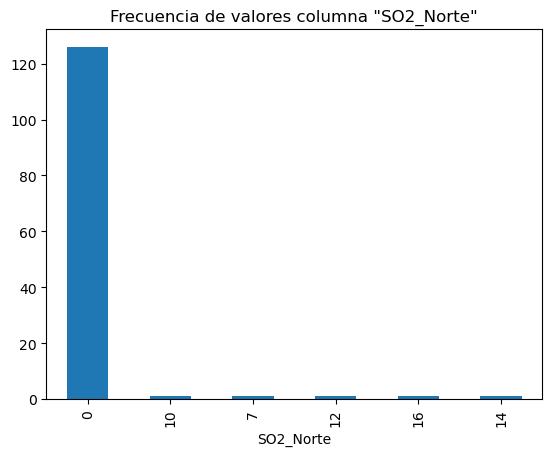

In [20]:
class_counts = dataset_Norte['SO2_Norte'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "SO2_Norte"')
# Mostrar el gráfico
plt.show() 

In [21]:
 print(dataset_Norte.groupby('NO_Norte').size())

NO_Norte
0     67
17     1
18     1
19     1
20     1
21     4
22     2
23     3
24     1
25     2
26     2
27     1
28     2
29     3
30     2
31     1
32     2
33     2
34     1
35     2
36     2
37     2
38     3
39     1
40     2
41     1
42     2
43     1
44     1
46     2
47     1
49     2
50     3
52     1
53     1
54     1
55     1
56     1
57     1
60     1
dtype: int64


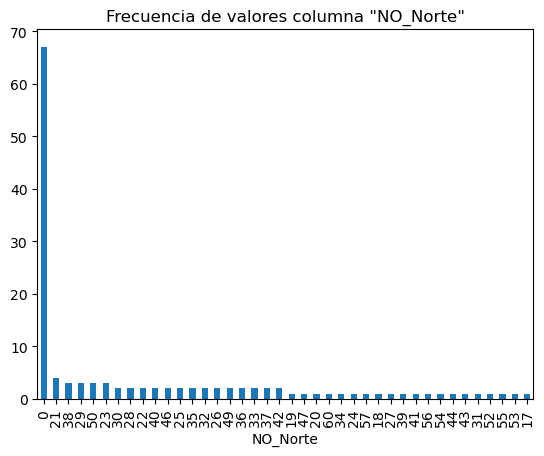

In [22]:
class_counts = dataset_Norte['NO_Norte'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "NO_Norte"')
# Mostrar el gráfico
plt.show() 

In [23]:
 print(dataset_Norte.groupby('O3_Norte').size())

O3_Norte
0     76
17     1
19     1
22     1
23     2
25     1
26     1
27     1
29     1
30     1
31     1
33     1
34     2
37     2
38     1
39     1
40     1
42     1
45     1
51     2
53     1
54     2
55     1
56     1
57     1
62     2
64     1
66     2
67     2
68     1
69     1
70     1
72     3
73     1
74     1
75     1
76     1
77     2
78     1
80     1
81     3
82     1
86     1
dtype: int64


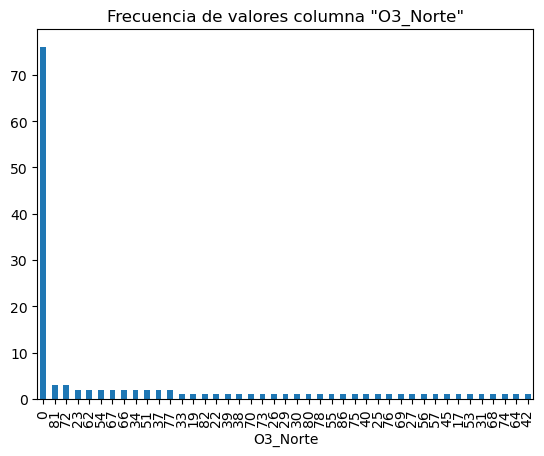

In [24]:
class_counts = dataset_Norte['O3_Norte'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "O3_Norte"')
# Mostrar el gráfico
plt.show() 

In [25]:
print(dataset_Norte.groupby('Particulas25_Norte').size())

Particulas25_Norte
0    131
dtype: int64


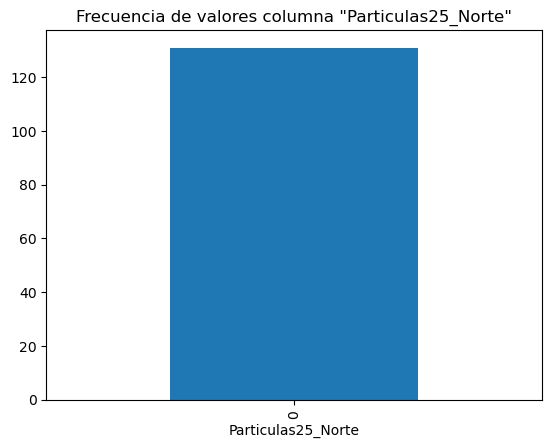

In [26]:
class_counts = dataset_Norte['Particulas25_Norte'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "Particulas25_Norte"')
# Mostrar el gráfico
plt.show() 

In [27]:
print(dataset_Norte.groupby('Particulas10_Norte').size())

Particulas10_Norte
0     119
9       2
10      1
11      1
12      2
13      2
16      1
19      1
20      1
21      1
dtype: int64


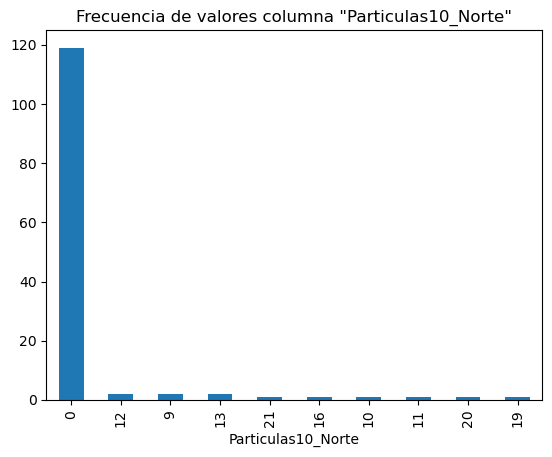

In [28]:
class_counts = dataset_Norte['Particulas10_Norte'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "Particulas10_Norte"')
# Mostrar el gráfico
plt.show() 

In [29]:
print(dataset_Norte.groupby('Benceno_Norte').size())

Benceno_Norte
0    129
1      2
dtype: int64


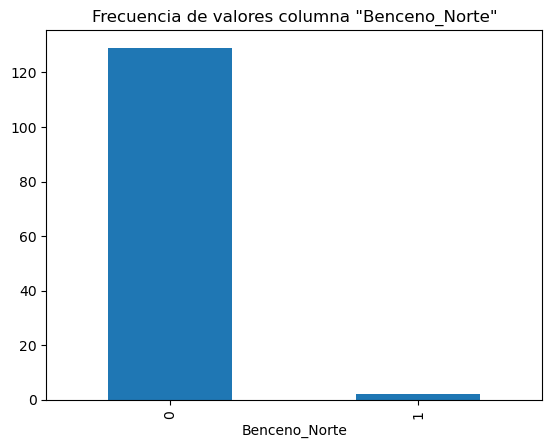

In [30]:
class_counts = dataset_Norte['Benceno_Norte'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "Benceno_Norte"')
# Mostrar el gráfico
plt.show() 

In [31]:
print(dataset_Norte.groupby('Muertes_Norte').size())

Muertes_Norte
11     1
12     4
13    10
14     7
15    11
16    16
17    15
18    17
19    13
20    19
21     4
22     2
23     7
26     2
27     1
28     1
30     1
dtype: int64


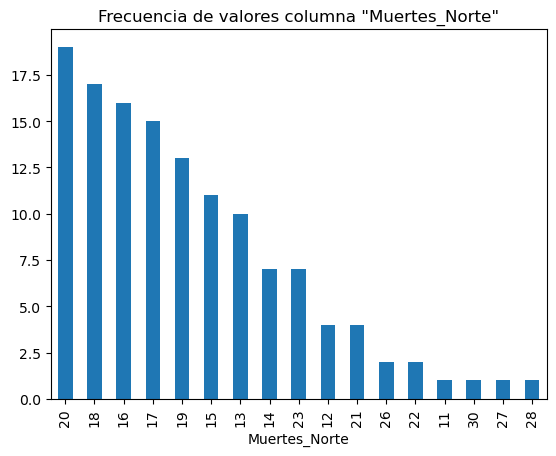

In [32]:
class_counts = dataset_Norte['Muertes_Norte'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "Muertes_Norte"')
# Mostrar el gráfico
plt.show() 

In [33]:
# La visualizacion de los diferentes valores de las columnas 'Particulas10_Sur' y 'Particulas25_Sur' muestran
# que no hay mediciones de los niveles de contentracion de las particulas < 10 y particulas < 2,5 (los valores son cero),
# por tanto, prescindimos de las columnas anteriores en el dataset_Sur           
dataset_Norte= dataset_Norte.drop(columns=[ 'Particulas25_Norte','Benceno_Norte' ], errors='ignore')
dataset_Norte.head()

,SO2_Norte,NO_Norte,O3_Norte,Particulas10_Norte,Muertes_Norte
0,0,47,23,0,14
1,0,42,0,0,13
2,0,37,54,0,12
3,0,33,64,0,13
4,10,0,67,0,13


In [34]:
for column in dataset_Norte.columns:
    # Calcular la media excluyendo los ceros
    media_columna = dataset_Norte[column][dataset_Norte[column] != 0].mean()
    # Reemplazar ceros por la media calculada
    dataset_Norte[column] = dataset_Norte[column].replace(0, media_columna)

In [35]:
print(dataset_Norte)

     SO2_Norte   NO_Norte   O3_Norte  Particulas10_Norte  Muertes_Norte
0         11.8  47.000000  23.000000               13.75             14
1         11.8  42.000000  54.181818               13.75             13
2         11.8  37.000000  54.000000               13.75             12
3         11.8  33.000000  64.000000               13.75             13
4         10.0  35.265625  67.000000               13.75             13
..         ...        ...        ...                 ...            ...
138       11.8  35.265625  77.000000               13.75             15
139       11.8  35.265625  54.000000               13.75             12
140       11.8  35.000000  42.000000               13.75             13
141       11.8  35.265625  54.181818               13.75             13
142       11.8  37.000000  54.181818               13.75             16

[131 rows x 5 columns]


# II. RED NEURONAL CON TRES CAPAS

In [37]:
# Se divide el set de datos en un set de entrenamiento y otro de pruebas.
train_dataset = dataset_Norte.sample(frac=0.8,random_state=0)
test_dataset = dataset_Norte.drop(train_dataset.index)

In [38]:
# Estadísticas generales 
# Se separa la variabe 'Muertes_Sur',porque sera la se use para predecir
train_stats = train_dataset.describe()
train_stats.pop("Muertes_Norte")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
SO2_Norte,105.0,11.800000,0.685004,7.0,11.800000,11.800000,11.800000,16.0
NO_Norte,105.0,34.888393,8.019939,18.0,32.000000,35.265625,35.265625,60.0
O3_Norte,105.0,54.941991,13.057864,17.0,54.181818,54.181818,54.181818,86.0
Particulas10_Norte,105.0,13.826190,1.296780,9.0,13.750000,13.750000,13.750000,21.0


In [39]:
# Separar el valor objetivo, "Muertes_Sur" de las caracteristicas.
# Esta etiqueta, "Muertes_Sur" es el valor que entrenara el modelo para predecir.
train_labels = train_dataset.pop('Muertes_Norte')
test_labels = test_dataset.pop('Muertes_Norte')


In [40]:
# Normalización del conjunto de datos de entranamientos con las estadísticas media y desviación estándar
# Se han de aplicar a cualquier otro tipo de dato que alimente el modelo, incluye al conjunto de datos de pruebas y
# los datos en vivo cuando el modelo se use en producción.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [41]:
print (normed_train_data)

     SO2_Norte  NO_Norte  O3_Norte  Particulas10_Norte
8     0.000000  0.047037 -0.301886            5.532016
61    0.000000 -0.110773 -0.301886           -3.721672
90    0.000000  0.047037  1.306340           -0.058754
106   0.000000  0.047037 -1.986695           -0.058754
71    0.000000  0.047037 -2.752517           -0.058754
..         ...       ...       ...                 ...
80    0.000000  0.047037 -0.058216           -0.058754
20    0.000000  1.385498 -0.058216           -0.058754
136   0.000000  0.047037 -0.058216           -0.058754
72    6.131349  0.637362 -0.058216           -0.058754
77    0.000000  0.047037  1.306340           -0.058754

[105 rows x 4 columns]


In [42]:
print(len(train_dataset.keys()))

4


In [43]:
# Construccion del modelo: se usa un modelo 'secuencial' con dos capas ocultas densamente conectadas
# y una capa de salida que devuelve un único valor continuo. cada capa tienee un tensor de entrada y un tensor de salida.
# Funcion de activación relu y en la primera capa se usa un argumento input_shape
# Los modelos creados con una forma de entrada predefinida como esta siempre tienen pesos (incluso antes de ver los datos) 
# y siempre tienen una forma de salida definida.
# Para compilar el modelo: se especifica la función de pérdida y el optimizador.  
# Los pasos de construcción del modelo se envuelven en una función, build_model
 

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [44]:
model = build_model()

In [45]:
# Para imprimir una descripción simple del modelo (inspeccionar el modelo)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Probar el modelo con un lote de 10 ejemplos de los datos de entrenamiento. 
# Se llama a model.predict en él.

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[-0.5152756 ],
       [ 0.37519917],
       [ 0.0857538 ],
       [-0.00366713],
       [-0.0073542 ],
       [ 0.00662031],
       [ 0.03613596],
       [ 0.05669817],
       [ 0.23970363],
       [-0.02089547]], dtype=float32)

In [47]:
# Entrenamiento del modelo durante 1000 épocas 
# Se registra la precisión de entrenamiento y validación en el objeto history.
# Display training progress by printing a single dot for each completed epoch

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: print('')
        print('.', end='')

EPOCHS = 250

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


..................................................
..................................................
..................................................
..................................................
..................................................

In [48]:
# Visualizacion del progreso de entrenamiento del modelo usando
# las estadísticas almacenadas en el objeto history.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch                      
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
245,9.674550,2.436679,9.674550,179.601379,6.071274,179.601379,245
246,9.664692,2.433270,9.664692,178.200333,6.036516,178.200333,246
247,9.667249,2.434885,9.667249,181.628952,6.089339,181.628952,247
248,9.660444,2.431752,9.660444,180.290756,6.055894,180.290756,248
249,9.660841,2.432707,9.660841,183.850433,6.113799,183.850433,249


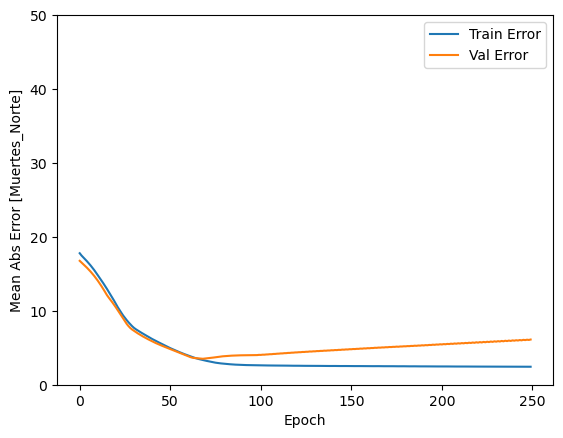

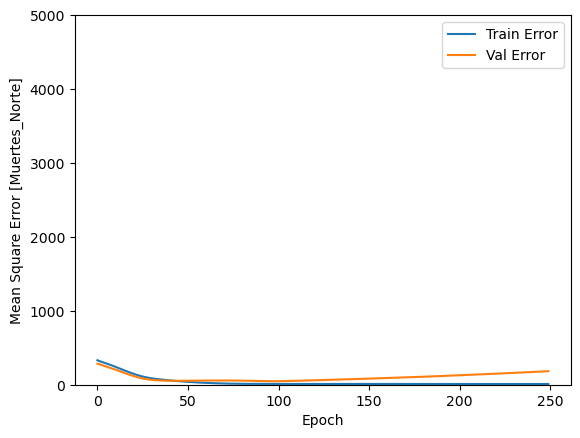

In [49]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Muertes_Norte]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,50])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Muertes_Norte]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,5000])
    plt.legend()
    plt.show()


plot_history(history)

Este gráfico muestra poca mejora, o incluso degradación en el error de validación después de aproximadamente 60 épocas. Actualicemos la llamada model.fit para detener automáticamente el entrenamiento cuando la puntuación de validación no mejore. Utilizaremos una * devolución de llamada de EarlyStopping * que pruebe una condición de entrenamiento para cada época. Si transcurre una cantidad determinada de épocas sin mostrar mejoría, entonces detiene automáticamente el entrenamiento.


..................................................
.................................

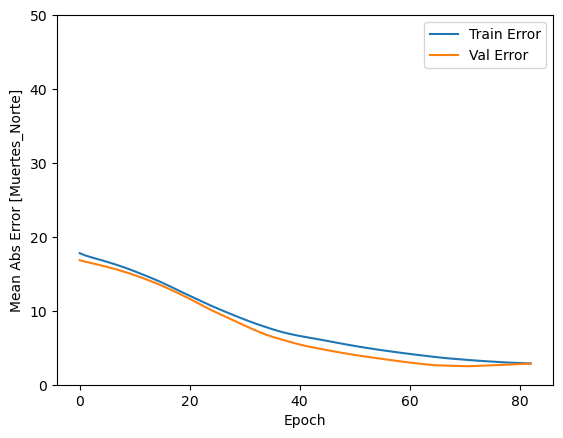

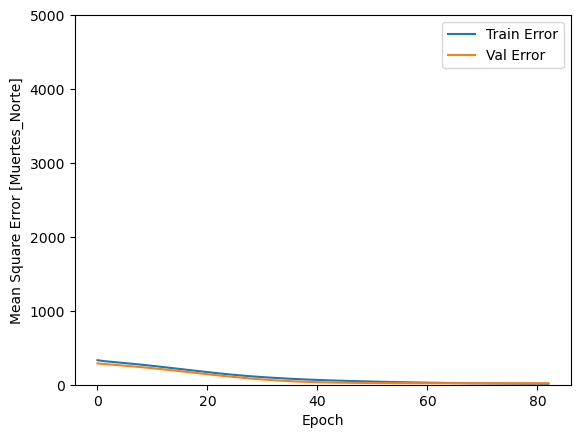

In [51]:
model = build_model()

# El parámetro de paciencia es la cantidad de épocas para comprobar si hay que mejorar.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

El gráfico muestra que en el conjunto de validación, el error promedio generalmente es muy pequeño practicamente coincide las lineas del conjunto de datos de entrenamiento y validación.

Comprobación como de bien generaliza el modelo al usar el conjunto ** test **, que no se uso para entrenar el modelo. Esto nos dice como de bien podemos esperar que el modelo prediga cuándo sea usado en el mundo real.

In [54]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

1/1 - 0s - 42ms/step - loss: 13.7203 - mae: 2.9093 - mse: 13.7203
Testing set Mean Abs Error:  2.91 


 Predicción de los valores de Muertes_Sur utilizando datos del conjunto de pruebas:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


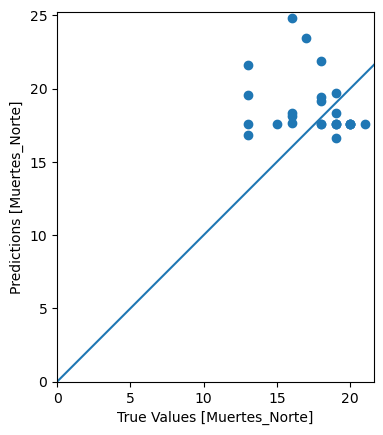

In [56]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Muertes_Norte]')
plt.ylabel('Predictions [Muertes_Norte]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [57]:
test_labels   

9      13
12     18
21     16
25     20
36     18
37     16
39     16
46     17
47     19
58     19
65     20
67     20
70     21
81     16
83     19
87     19
88     19
102    18
103    20
114    18
116    15
117    18
119    19
135    13
140    13
141    13
Name: Muertes_Norte, dtype: int64

Parece que el modelo predice bien en el rango de valores de 'Muertes_InteriorM30' entre 58 y 90. Echemos un vistazo a la distribución de errores.

In [59]:
test_predictions

array([19.537998, 21.874062, 17.637388, 17.600582, 17.600582, 24.816875,
       18.316648, 23.435722, 19.678362, 17.600582, 17.600582, 17.600582,
       17.600582, 18.102318, 18.326843, 17.600582, 16.625507, 19.437033,
       17.600582, 19.13837 , 17.600582, 17.600582, 17.600582, 21.615631,
       16.808174, 17.600582], dtype=float32)

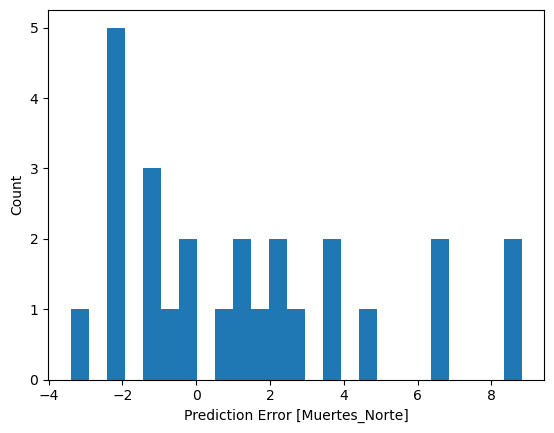

In [60]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Muertes_Norte]")
_ = plt.ylabel("Count")

La distribucion del error es casi una funcion gaussiana

In [62]:
#(Adicional)
# Comparar con otra alternativa 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

modelRF = RandomForestRegressor(n_estimators=10, random_state=0)

modelRF.fit(train_dataset, train_labels)
preds_test= modelRF.predict(test_dataset)

print('MSE RF : %.3f' % mean_squared_error(test_labels, preds_test, squared=True))
print('MSE DL : %.3f' % mse)
print('MAE RF : %.3f' % mean_absolute_error(test_labels, preds_test))
print('MAE DL : %.3f' % mae)

MSE RF : 9.861
MSE DL : 13.720
MAE RF : 2.188
MAE DL : 2.909


# III. Comparación del desempeño de modelos

Comparación del desempeño de modelos. Se muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


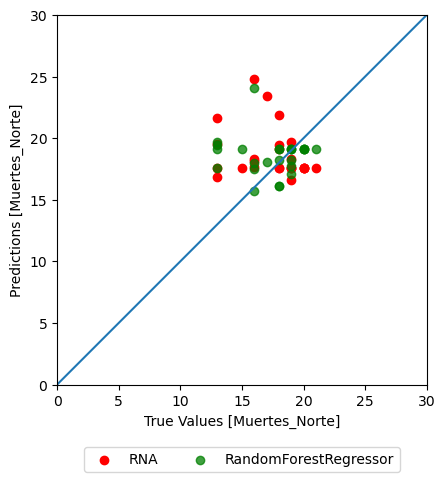

In [65]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions,c='red',label='RNA')
plt.scatter(test_labels, preds_test,c='green' ,alpha=0.75,label='RandomForestRegressor')
plt.xlabel('True Values [Muertes_Norte]')
plt.ylabel('Predictions [Muertes_Norte]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,30])
plt.ylim([0,30])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=2)
_ = plt.plot([-100, 100], [-100, 100])

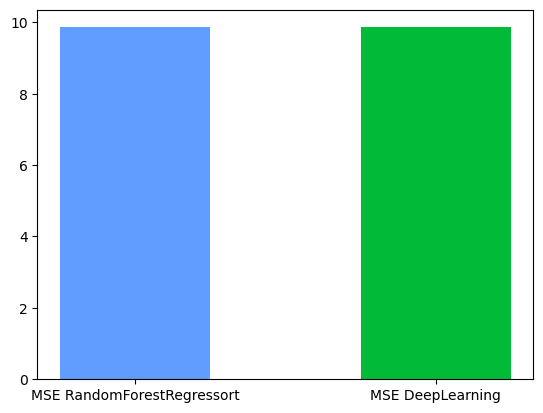

In [66]:
x = ["MSE RandomForestRegressort", "MSE DeepLearning"]
y = [mean_squared_error(test_labels, preds_test, squared=True),mean_squared_error(test_labels, preds_test, squared=True)]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, width = 0.5,color=["#619cff", "#00ba38"])
plt.show()

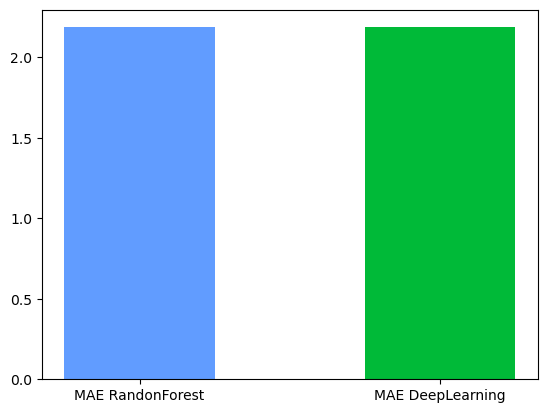

In [67]:
x = ["MAE RandonForest", "MAE DeepLearning"]
y = [mean_absolute_error(test_labels, preds_test), mean_absolute_error(test_labels, preds_test)]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, width = 0.5, color=["#619cff", "#00ba38"])
plt.show()

# IV. RED NEURONAL CON CUATRO CAPAS

In [69]:
# Se divide el set de datos en un set de entrenamiento y otro de pruebas.
train_dataset = dataset_Norte.sample(frac=0.8,random_state=0)
test_dataset = dataset_Norte.drop(train_dataset.index)
train_dataset

,SO2_Norte,NO_Norte,O3_Norte,Particulas10_Norte,Muertes_Norte
8,11.8,35.265625,51.000000,21.00,11
61,11.8,34.000000,51.000000,9.00,26
90,11.8,35.265625,72.000000,13.75,19
106,11.8,35.265625,29.000000,13.75,20
71,11.8,35.265625,19.000000,13.75,22
...,...,...,...,...,...
80,11.8,35.265625,54.181818,13.75,15
20,11.8,46.000000,54.181818,13.75,14
136,11.8,35.265625,54.181818,13.75,15
72,16.0,40.000000,54.181818,13.75,19


In [70]:
# Estadísticas generales 
# Se separa la variabe 'Muertes_Sur',porque sera la se use para predecir
train_stats = train_dataset.describe()
train_stats.pop("Muertes_Norte")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
SO2_Norte,105.0,11.800000,0.685004,7.0,11.800000,11.800000,11.800000,16.0
NO_Norte,105.0,34.888393,8.019939,18.0,32.000000,35.265625,35.265625,60.0
O3_Norte,105.0,54.941991,13.057864,17.0,54.181818,54.181818,54.181818,86.0
Particulas10_Norte,105.0,13.826190,1.296780,9.0,13.750000,13.750000,13.750000,21.0


In [71]:
# Separar el valor objetivo, "Muertes_Sur" de las caracteristicas.
# Esta etiqueta, "Muertes_Sur" es el valor que entrenara el modelo para predecir.
train_labels = train_dataset.pop('Muertes_Norte')
test_labels = test_dataset.pop('Muertes_Norte')
train_labels 

8      11
61     26
90     19
106    20
71     22
       ..
80     15
20     14
136    15
72     19
77     16
Name: Muertes_Norte, Length: 105, dtype: int64

In [72]:
# Normalización del conjunto de datos de entranamientos con las estadísticas media y desviación estándar
# Se han de aplicar a cualquier otro tipo de dato que alimente el modelo, incluye al conjunto de datos de pruebas y
# los datos en vivo cuando el modelo se use en producción.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [73]:
# Construccion del modelo: se usa un modelo 'secuencial' con TRES capas ocultas densamente conectadas
# y una capa de salida que devuelve un único valor continuo. cada capa tienee un tensor de entrada y un tensor de salida.
# Funcion de activación relu y en la primera capa se usa un argumento input_shape
# Los modelos creados con una forma de entrada predefinida como esta siempre tienen pesos (incluso antes de ver los datos) 
# y siempre tienen una forma de salida definida.
# Para compilar el modelo: se especifica la función de pérdida y el optimizador.  
# Los pasos de construcción del modelo se envuelven en una función, build_model
 

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [74]:
model = build_model()

In [75]:
# Para imprimir una descripción simple del modelo (inspeccionar el modelo)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Probar el modelo con un lote de 10 ejemplos de los datos de entrenamiento. 
# Se llama a model.predict en él.

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[ 0.06901516],
       [-0.30099   ],
       [ 0.02040629],
       [-0.15563928],
       [-0.2142171 ],
       [-0.00494491],
       [-0.03034745],
       [-0.0039993 ],
       [ 0.02286118],
       [-0.05005399]], dtype=float32)

In [77]:
# Entrenamiento del modelo durante 400 épocas 
# Se registra la precisión de entrenamiento y validación en el objeto history.
# Display training progress by printing a single dot for each completed epoch

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: print('')
        print('.', end='')

EPOCHS = 150
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


..................................................
..................................................
..................................................

In [78]:
# Visualizacion del progreso de entrenamiento del modelo usando
# las estadísticas almacenadas en el objeto history.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch                      
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
145,9.929427,2.477043,9.929427,77.396988,4.909932,77.396988,145
146,9.944818,2.496652,9.944818,72.751694,4.690253,72.751694,146
147,9.923940,2.473571,9.923940,77.157532,4.897286,77.157532,147
148,9.920962,2.490892,9.920962,73.677116,4.716109,73.677116,148
149,9.911843,2.470876,9.911843,77.315323,4.895533,77.315323,149


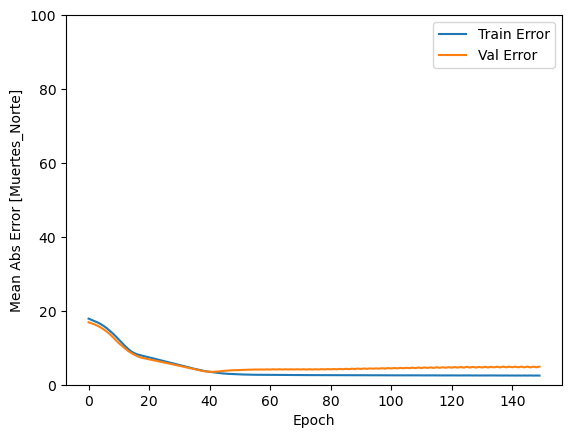

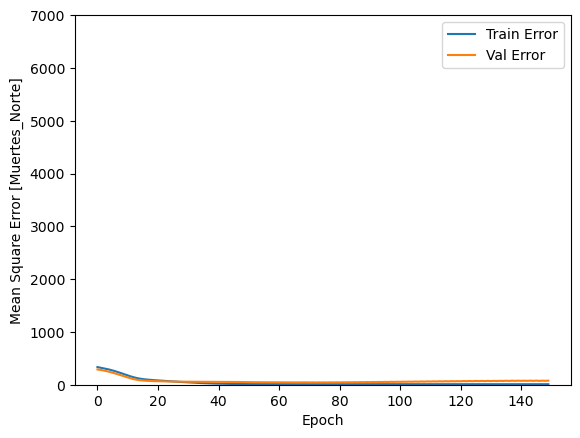

In [79]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Muertes_Norte]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,100])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Muertes_Norte]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,7000])
    plt.legend()
    plt.show()


plot_history(history)


..................................

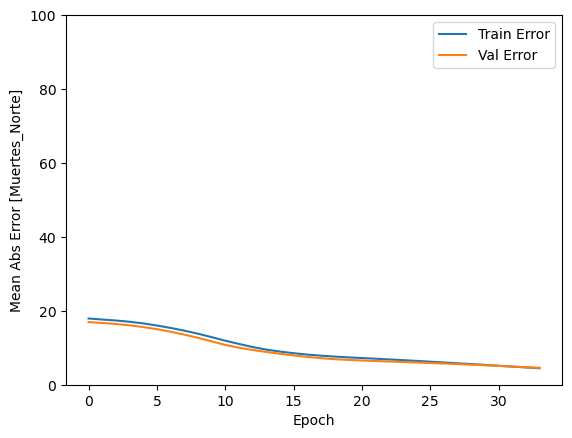

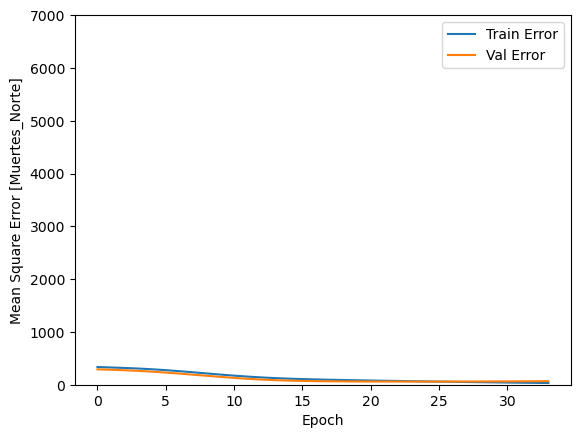

In [80]:
model = build_model()

# El parámetro de paciencia es la cantidad de épocas para comprobar si hay que mejorar.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [81]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

1/1 - 0s - 41ms/step - loss: 33.2607 - mae: 4.8721 - mse: 33.2607
Testing set Mean Abs Error:  4.87 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


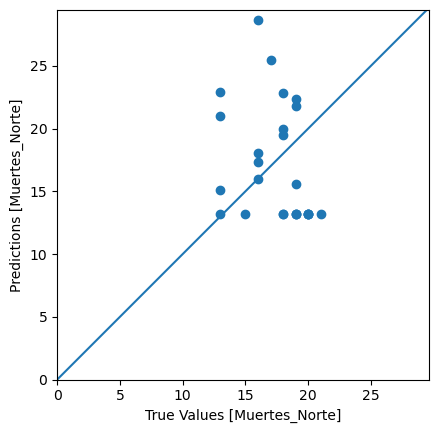

In [82]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels , test_predictions)
plt.xlabel('True Values [Muertes_Norte]')
plt.ylabel('Predictions [Muertes_Norte]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

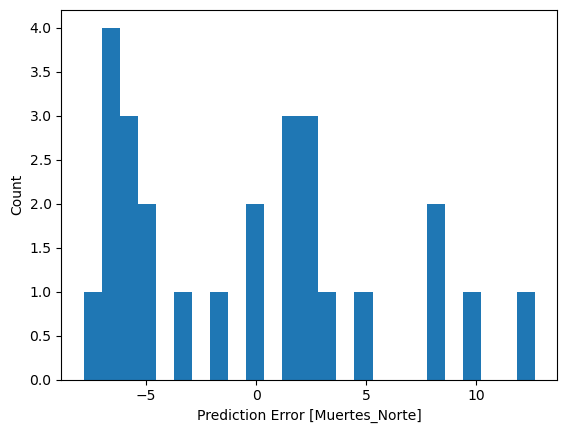

In [83]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Muertes_Norte]")
_ = plt.ylabel("Count")

In [84]:
#(Adicional)
# Comparar con otra alternativa 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

modelRF = RandomForestRegressor(n_estimators=10, random_state=0)

modelRF.fit(train_dataset, train_labels)
preds_test= modelRF.predict(test_dataset)

print('MSE RF : %.3f' % mean_squared_error(test_labels, preds_test, squared=True))
print('MSE DL : %.3f' % mse)
print('MAE RF : %.3f' % mean_absolute_error(test_labels, preds_test))
print('MAE DL : %.3f' % mae)

MSE RF : 9.861
MSE DL : 33.261
MAE RF : 2.188
MAE DL : 4.872


# V. Comparación del desempeño de modelos

 Comparación del desempeño de modelos. Se muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


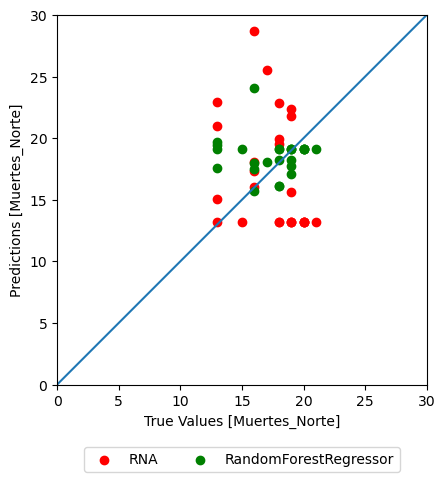

In [87]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions,c='red',label='RNA')
plt.scatter(test_labels, preds_test,c='green' ,alpha=1,label='RandomForestRegressor')
plt.xlabel('True Values [Muertes_Norte]')
plt.ylabel('Predictions [Muertes_Norte]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,30])
plt.ylim([0,30])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=2)
_ = plt.plot([-100, 100], [-100, 100])
 

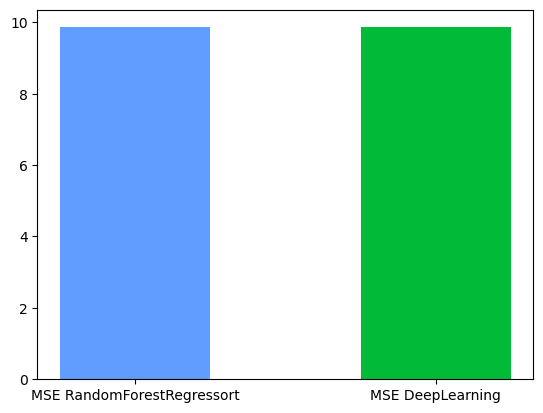

In [88]:
x = ["MSE RandomForestRegressort", "MSE DeepLearning"]
y = [mean_squared_error(test_labels, preds_test, squared=True),mean_squared_error(test_labels, preds_test, squared=True)]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, width = 0.5,color=["#619cff", "#00ba38"])
plt.show()

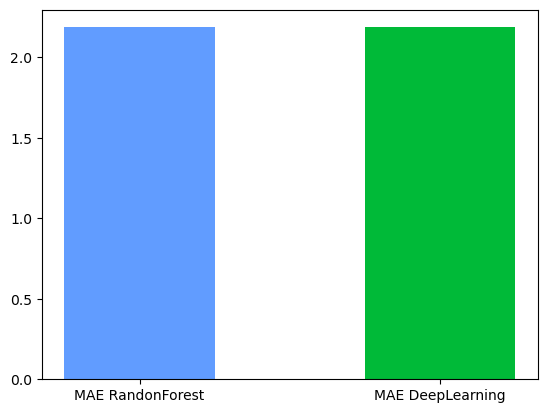

In [89]:
x = ["MAE RandonForest", "MAE DeepLearning"]
y = [mean_absolute_error(test_labels, preds_test), mean_absolute_error(test_labels, preds_test)]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, width = 0.5, color=["#619cff", "#00ba38"])
plt.show()